## Project Objective

The objective of this project is to develop an accurate and reliable regression model that predicts house prices in India based on key property features. By leveraging a well-curated dataset and advanced machine learning techniques, the goal is to enable real estate stakeholders to better estimate property values and support informed decision-making.

Key objectives include:

- Perform exploratory data analysis and feature engineering to identify the most important predictors of house prices.
- Build and evaluate multiple regression models to establish a strong baseline.
- Apply advanced models like Random Forest Regressor and optimize hyperparameters to improve prediction accuracy.
- Interpret model results through feature importance analysis to understand key value drivers.
- Lay the groundwork for a user-friendly application for real-time price prediction in the future.

This project aims to demonstrate an end-to-end machine learning workflow—from data preparation and modeling to evaluation and interpretation—focused on solving real-world property valuation challenges.


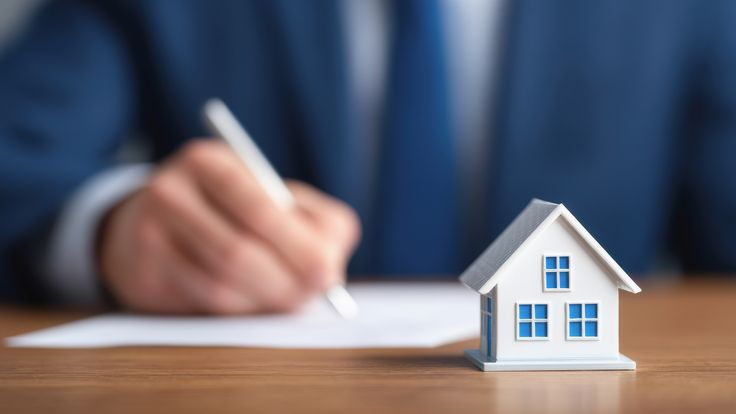

In [70]:
#Importing pandas library for data manipulation
import pandas as pd

In [71]:
#Reading the file in csv
df = pd.read_csv('/content/House prices india.csv')

In [47]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [49]:
df.shape

(14619, 23)

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14619.0,6.762821e+09,6237.161975,6.762810e+09,6.762815e+09,6.762821e+09,6.762826e+09,6.762832e+09
Date,14619.0,4.260455e+04,67.343747,4.249100e+04,4.254600e+04,4.260000e+04,4.266200e+04,4.273400e+04
number of bedrooms,14619.0,3.379233e+00,0.938655,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
number of bathrooms,14619.0,2.129557e+00,0.769955,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living area,14619.0,2.098157e+03,928.218740,3.700000e+02,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
lot area,14619.0,1.509369e+04,37920.885355,5.200000e+02,5.010500e+03,7.620000e+03,1.080000e+04,1.074218e+06
number of floors,14619.0,1.502326e+00,0.540241,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront present,14619.0,7.661263e-03,0.087196,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
number of views,14619.0,2.328477e-01,0.765651,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition of the house,14619.0,3.430399e+00,0.664047,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [51]:
df.isnull().sum()

,0
id,0
Date,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0


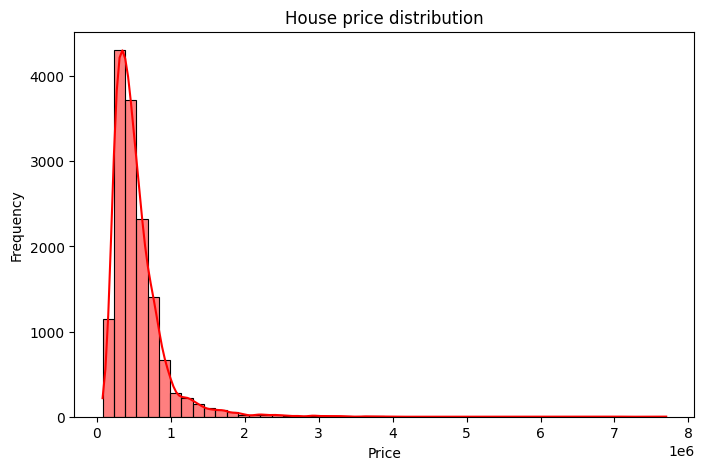

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(x= df['Price'], bins=50, kde=True, color='Red')
plt.title('House price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

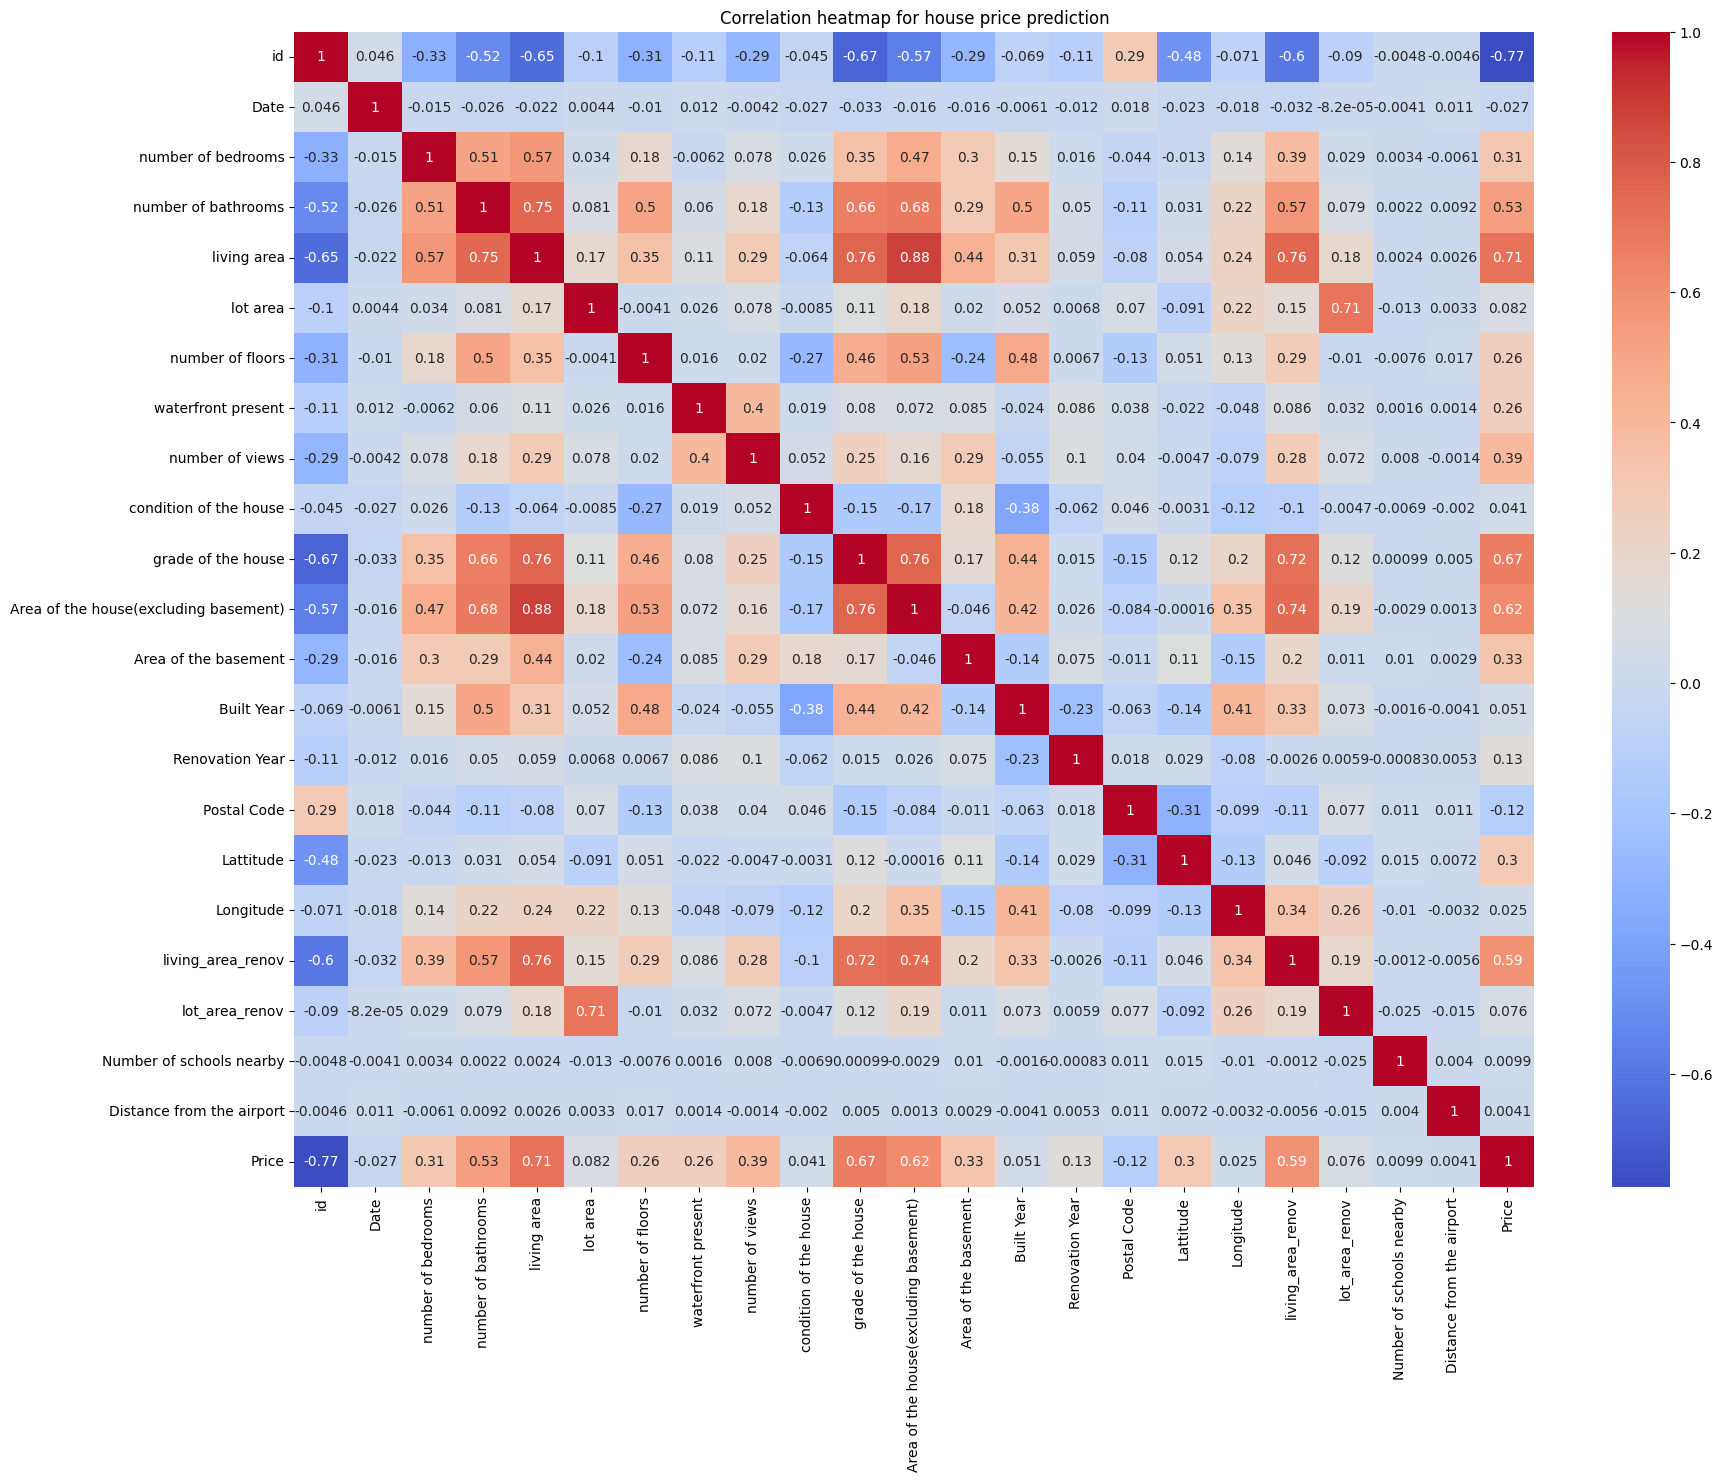

In [53]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap for house price prediction')
plt.show()

Looking at your correlation heatmap, these features have the highest positive correlation with the price column:

living_area_renov

grade of the house

Area of the house (excluding basement)

living area

number of bedrooms

These features are most strongly linked to price and should be your main predictors for your regression model, especially for a basic regression approach.

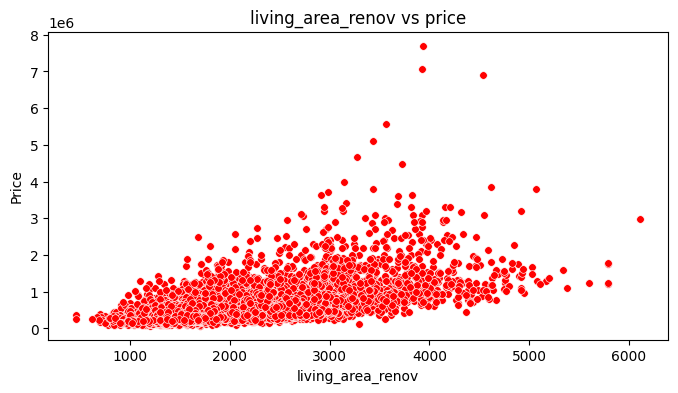

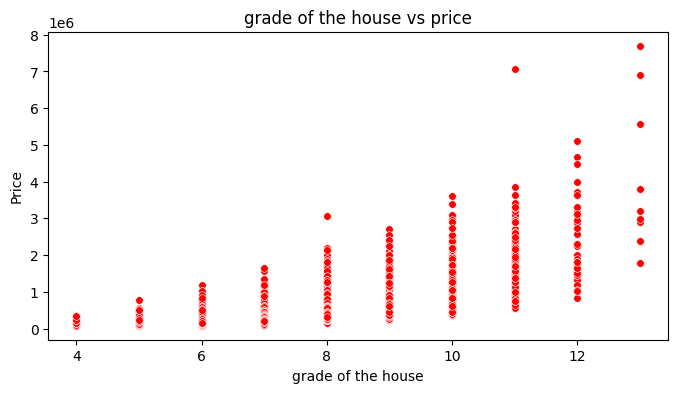

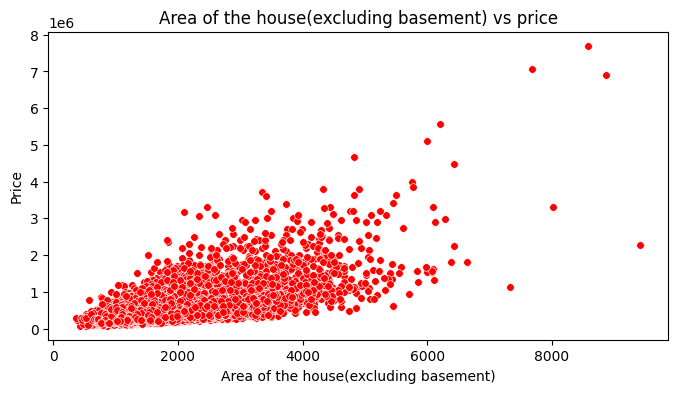

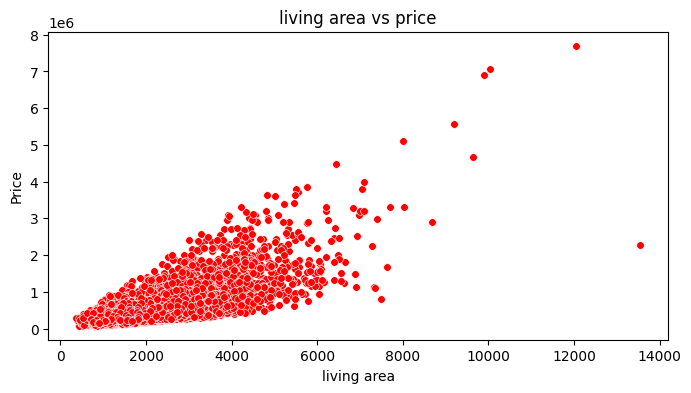

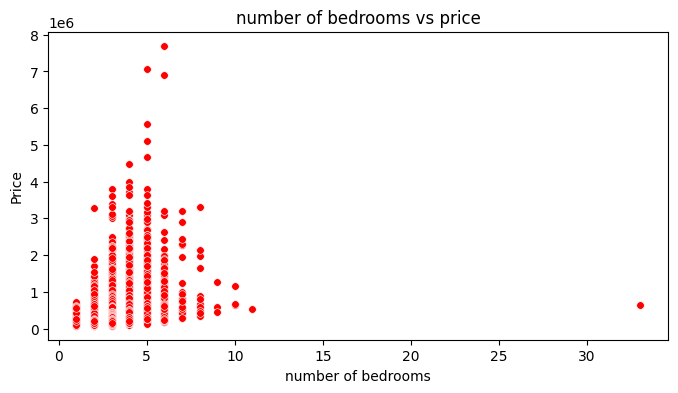

In [76]:
feat = ['living_area_renov', 'grade of the house', 'Area of the house(excluding basement)', 'living area', 'number of bedrooms']

for features in feat:

  plt.figure(figsize=(8,4))
  sns.scatterplot(x=df[features], y=df['Price'], s=30, color='red')
  plt.title(f'{features} vs price')
  plt.show()

### Scatterplot Observations for Key Features

**living_area_renov vs Price**
- Shows a clear positive relationship: as living area after renovation increases, so does house price, although some spread and outliers are visible.

**grade of the house vs Price**
- Higher grade houses tend to command higher prices, with an upward step-like trend; the relationship appears strong and monotonic.

**Area of the house (excluding basement) vs Price**
- Prices increase as house area increases, with similar spread and outliers seen for other size-based features.

**living area vs Price**
- A larger living area generally corresponds to higher house prices, confirming this as an important predictor.

**number of bedrooms vs Price**
- House price tends to increase with more bedrooms, but with more variability and less linearity compared to area-based features.

---

These observations confirm that area, grade, and bedroom count are strongly related to price, making them good candidates for regression modeling.


In [55]:
#selecting the features we need to include in our model
features = ['living_area_renov',
            'Area of the house(excluding basement)',
            'number of bedrooms',
            'grade of the house',
            'Postal Code']

X = df[features]
y = df['Price']

In [56]:
#Lets split the training and testing data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', mean_squared_error(y_test,y_pred))
print('R2 Score', r2_score(y_test,y_pred))


MAE: 169416.13762973784
RMSE: 75112062882.89471
R2 Score 0.49247259014522193


In [57]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)                        # Take square root to get RMSE
print('RMSE:', rmse)


RMSE: 274065.8002795947


### Regression Model Evaluation Metrics Summary

| Metric                 | Description                                                                                       | Interpretation                                            |
|------------------------|-------------------------------------------------------------------------------------------------|-----------------------------------------------------------|
| Mean Absolute Error (MAE)    | Average of absolute differences between predicted and actual values                             | Average error magnitude, in the target's units           |
| Mean Squared Error (MSE)     | Average of squared differences between predicted and actual values                            | Penalizes larger errors more; not in original units      |
| Root Mean Squared Error (RMSE)| Square root of MSE; returns error to target's original scale                                | More sensitive to large errors; comparable to MAE        |
| R-squared (R²)             | Proportion of variance in target explained by the model                                    | Closer to 1 means better fit; 0 means no explanatory power |

#### Notes:
- **MAE** tells you on average how far your model's predictions deviate from actual values, regardless of direction.
- **RMSE** gives greater weight to large errors, making it useful when large prediction mistakes are especially undesirable.
- **R²** explains how well your model captures the variance of the target variable; higher is better but can never exceed 1.


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_predict = rf.predict(X_test)

mae = mean_absolute_error(y_test, rf_predict)
mse = mean_squared_error(y_test, rf_predict)
r2 = r2_score(y_test, rf_predict)

print('Mean absolute error is:', mae)
print('Mean squared error is:', mse)
print('r2 score is :', r2)

Mean absolute error is: 97821.70309458124
Mean squared error is: 38903126446.614235
r2 score is : 0.7371340601910237


### Random Forest Regressor Model Performance

| Metric                 | Value                |
|------------------------|----------------------|
| Mean Absolute Error    | ₹97,822              |
| Mean Squared Error     | ₹39,903,126,447      |
| R² Score               | 0.74                 |

- The Random Forest Regressor provides a significant improvement over linear regression, reducing the average prediction error to about ₹98,000 and explaining 74% of the variance in house prices.
- This suggests Random Forest is much better suited to the complex relationships in the house price dataset.
- Lower errors and higher R² indicate more reliable predictions, making this model a strong candidate for further tuning or deployment.


In [59]:
from sklearn.model_selection import RandomizedSearchCV

#define the hyperparameter grid
param_dist = {
    'n_estimators':[50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print('Best hyperparameters:', random_search.best_params_)
print('Best MAE score:', -random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print('Test MAE:', mean_absolute_error(y_test, y_pred))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Test R2:', r2_score(y_test,y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
33 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best MAE score: 107899.03584021966
Test MAE: 107846.64886525575
Test RMSE: 199767.9449756001
Test R2: 0.730349384203542


### Random Forest Hyperparameter Tuning Results

- **Best Hyperparameters found**:
  - Number of trees (`n_estimators`): 50  
  - Minimum samples to split an internal node (`min_samples_split`): 2  
  - Minimum samples at a leaf node (`min_samples_leaf`): 2  
  - Number of features considered at each split (`max_features`): 'sqrt'  
  - Maximum depth of each tree (`max_depth`): None (no limit)  
  - Whether bootstrap samples are used (`bootstrap`): False  

- **Performance Metrics:**
  - Best MAE score during validation: ₹107,899  
  - Test set MAE: ₹107,847 (average absolute error of price prediction)
  - Test set RMSE: ₹199,768 (root mean squared error, penalizing larger errors more)
  - Test set R²: 0.73 (model explains 73% of price variability)

- **Interpretation:**
  - The tuning improved performance slightly compared to the untuned model.
  - Trees with unlimited depth and considering the square root of features at each split provided the best results.
  - Model predicts house prices with an average error around ₹1 lakh, explaining the majority of price variance.
  - Disabling bootstrap sampling (`bootstrap=False`) means trees are trained on the whole dataset instead of random samples, which was beneficial here.

This tuned Random Forest model can be used confidently for predicting house prices or as a baseline for further improvements.


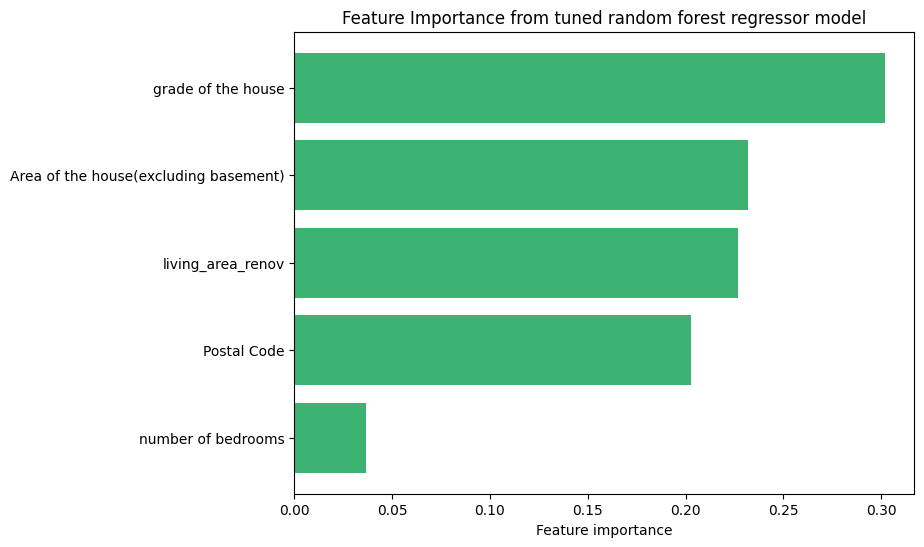

In [60]:
feature_importances = best_model.feature_importances_

#Feature names in the training data

feature_names = X_train.columns

#Creating a dataframe for plotting
feat_imp_df = pd.DataFrame({'features':feature_names, 'importance':feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=True)


plt.figure(figsize=(8,6))
plt.barh(feat_imp_df['features'], feat_imp_df['importance'], color='mediumseagreen')
plt.title('Feature Importance from tuned random forest regressor model')
plt.xlabel('Feature importance')
plt.show()


### Feature Importance from Tuned Random Forest Model

The feature importance plot shows which input features the Random Forest regressor considered most useful for predicting house prices:

- **grade of the house** is the most important predictor, meaning the overall quality/grade of a house has the largest influence on price.
- **Area of the house (excluding basement)** and **living_area_renov** also play strong roles, indicating that the usable area after renovation and original house size are significant factors in determining price.
- **Postal Code** contributes meaningfully, reflecting the impact of location/geography on property values.
- **number of bedrooms** has the least influence among your selected features, suggesting that simply counting bedrooms is less important than the other variables for price prediction.

These insights help validate that your model is focusing on the most relevant aspects of house pricing, and can guide further analysis, business decisions, or future feature engineering.


## Project Conclusion

This house price prediction project utilized advanced regression techniques on a rich dataset to estimate property values, focusing on key factors like living area after renovation, area excluding basement, number of bedrooms, house grade, and postal code.

- Extensive exploratory data analysis informed feature selection and preprocessing, ensuring data quality and relevance.
- Initial baseline with Linear Regression provided a foundation, but Random Forest Regression significantly enhanced predictive accuracy and robustness.
- Hyperparameter tuning refined the Random Forest model, achieving a mean absolute error around ₹108,000 and an R² score of approximately 0.73, indicating strong explanatory power.
- Feature importance analysis revealed that house grade and usable living area are the dominant factors influencing price, aligning well with domain knowledge.
- Evaluation metrics like MAE, RMSE, and R² were systematically used to assess and compare models, ensuring reliability.
- The project demonstrates a complete end-to-end machine learning workflow—from data analysis to model tuning and interpretation—laying groundwork for production deployment.

### Future Work

- Developing an interactive web or mobile app to enable real-time price prediction.
- Incorporating additional data sources such as neighborhood characteristics and market trends.
- Experimenting with other advanced modeling techniques and online learning approaches.
- Implementing continuous model evaluation and updates based on incoming data.

This project highlights the power and practicality of machine learning in real estate valuation and provides a strong foundation for further innovation and deployment.
